In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()

from pylab import rcParams
from pandas import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<ipython-input-1-35fd721fb2f4>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
from pandas  import  Grouper, concat
import calendar

import warnings
warnings.filterwarnings("ignore")

In [3]:
Sparkling = pd.read_csv('Sparkling.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [4]:
print(Sparkling.isnull().sum())
nan_list = list(Sparkling[Sparkling.isnull() == True].index)
Sparkling[Sparkling.isnull() == True]

0


Series([], Name: Sparkling, dtype: int64)

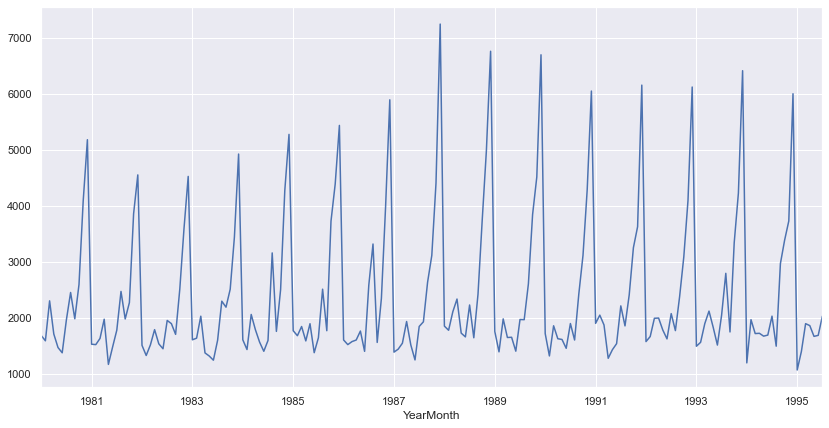

In [5]:
rcParams['figure.figsize'] = 14, 7
Sparkling.plot();

In [6]:
Sparkling.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

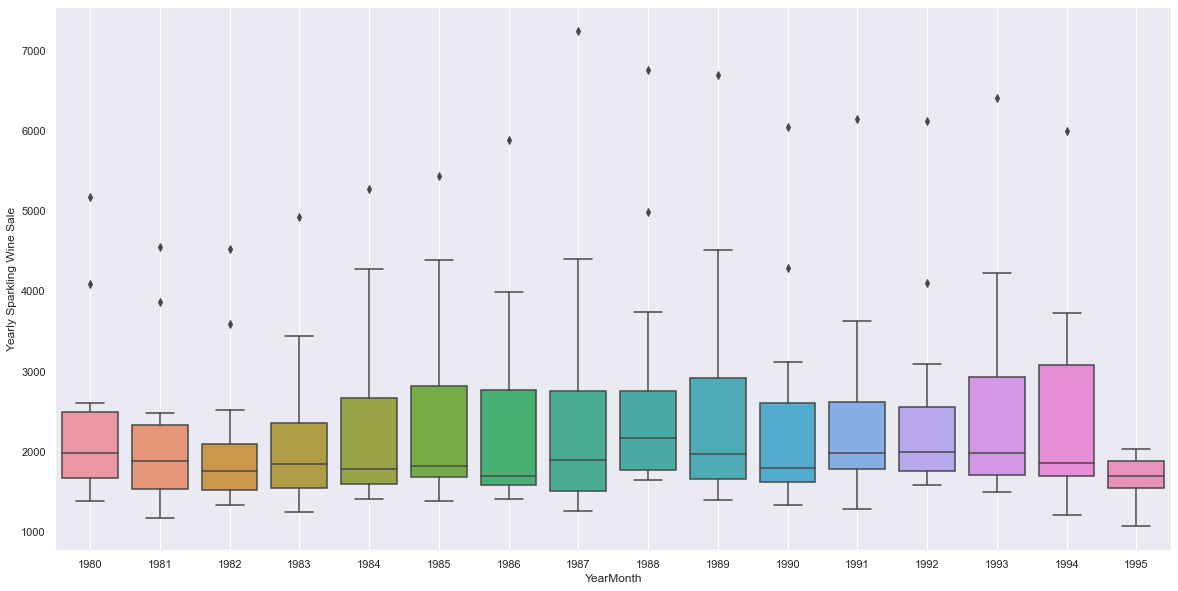

In [7]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x = Sparkling.index.year,y = Sparkling)
plt.grid();
plt.ylabel('Yearly Sparkling Wine Sale');

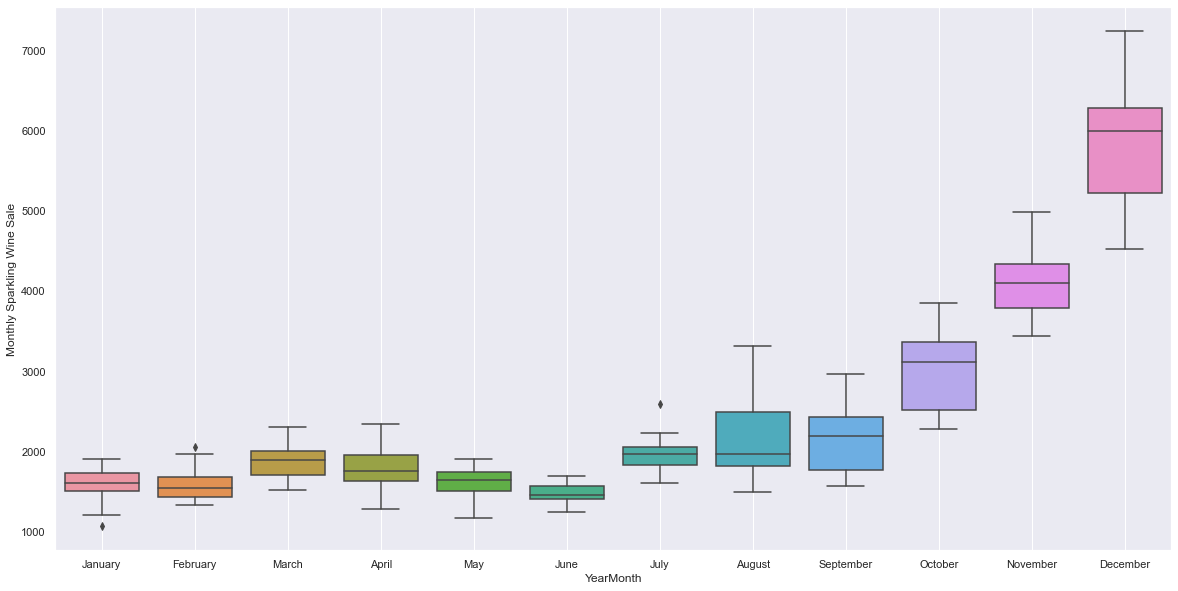

In [8]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x=Sparkling.index.month_name(),y=Sparkling)
plt.grid();
plt.ylabel('Monthly Sparkling Wine Sale');

In [9]:
Monthly_Sparkling_Sales = pd.pivot_table(pd.DataFrame(Sparkling),columns = Sparkling.index.month,index=Sparkling.index.year)
Monthly_Sparkling_Sales

Sparkling                                                          \
YearMonth        1       2       3       4       5       6       7       8    
YearMonth                                                                     
1980         1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981         1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982         1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983         1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984         1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985         1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986         1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987         1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988         1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989         1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990         1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991         1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992         1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993         1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994         1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995         1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

                                           
YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

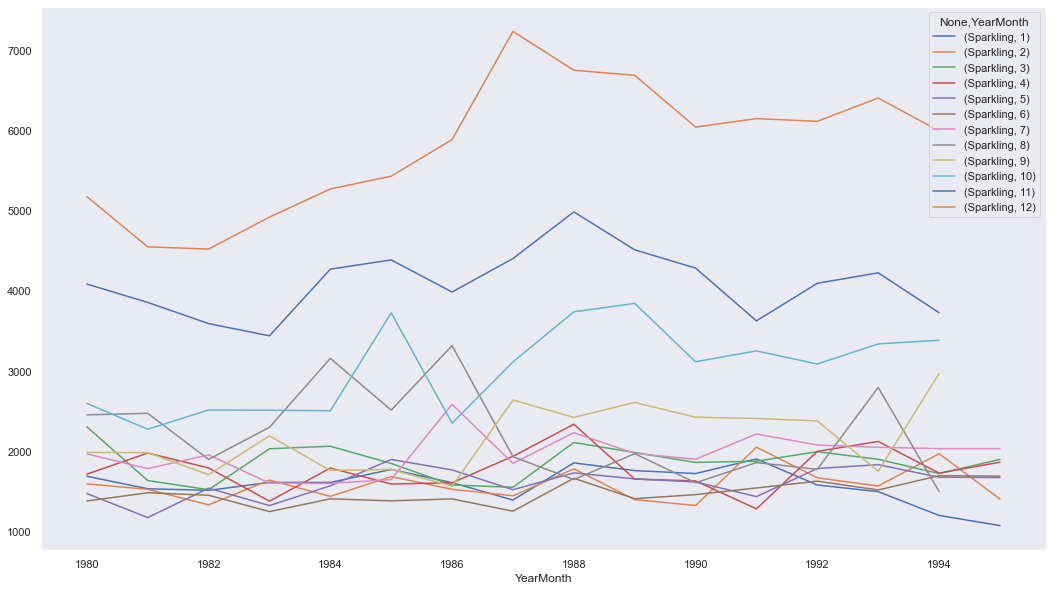

In [10]:
fig,ax=plt.subplots(figsize=(18,10))
Monthly_Sparkling_Sales.plot(ax=ax)
plt.grid()

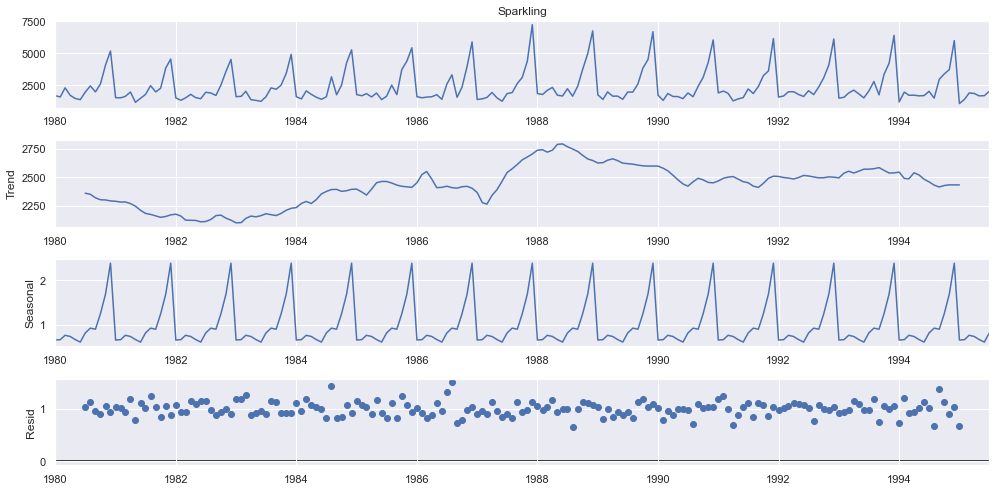

In [11]:
rcParams['figure.figsize'] = 14, 7
decomposition_mul=seasonal_decompose(Sparkling,model='multiplicative')
decomposition_mul.plot();

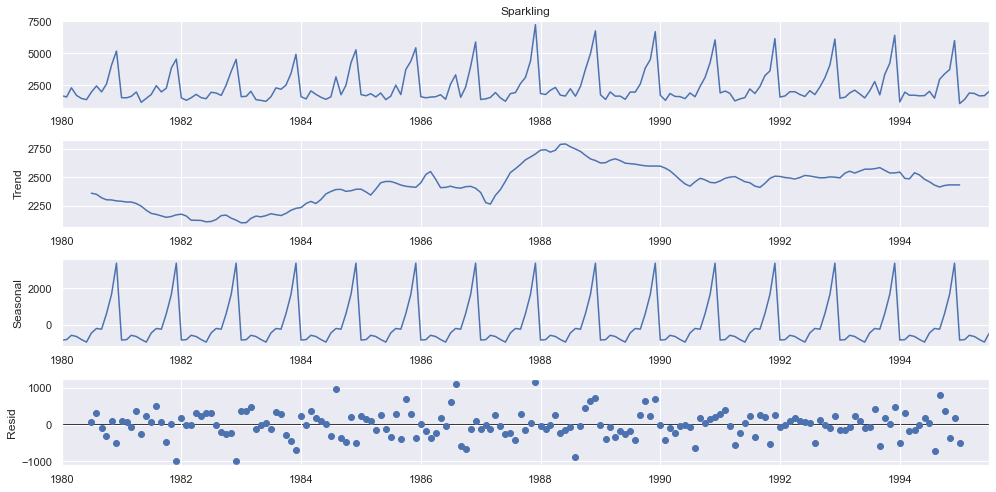

In [12]:
rcParams['figure.figsize'] = 14, 7
decomposition_mul=seasonal_decompose(Sparkling,model='additive')
decomposition_mul.plot();

In [13]:
# TRAIN TEST SPLIT
#test data selected starting from 1991

In [14]:
train_spark = Sparkling[Sparkling.index.year < 1991]
test_spark = Sparkling[Sparkling.index.year > 1990]

In [15]:
print('Length of the Train Data :',len(train_spark))
print('Length of the Train Data :',len(test_spark))

Length of the Train Data : 132
Length of the Train Data : 55


In [16]:
print('First few rows of the Train Data:','\n',train_spark.head())
print('Last few rows of the Train Data:','\n',train_spark.tail())
print('First few rows of the Test Data:','\n',test_spark.head())
print('Last few rows of the Test Data:','\n',test_spark.tail())

First few rows of the Train Data: 
 YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64
Last few rows of the Train Data: 
 YearMonth
1990-08-01    1605
1990-09-01    2424
1990-10-01    3116
1990-11-01    4286
1990-12-01    6047
Name: Sparkling, dtype: int64
First few rows of the Test Data: 
 YearMonth
1991-01-01    1902
1991-02-01    2049
1991-03-01    1874
1991-04-01    1279
1991-05-01    1432
Name: Sparkling, dtype: int64
Last few rows of the Test Data: 
 YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64


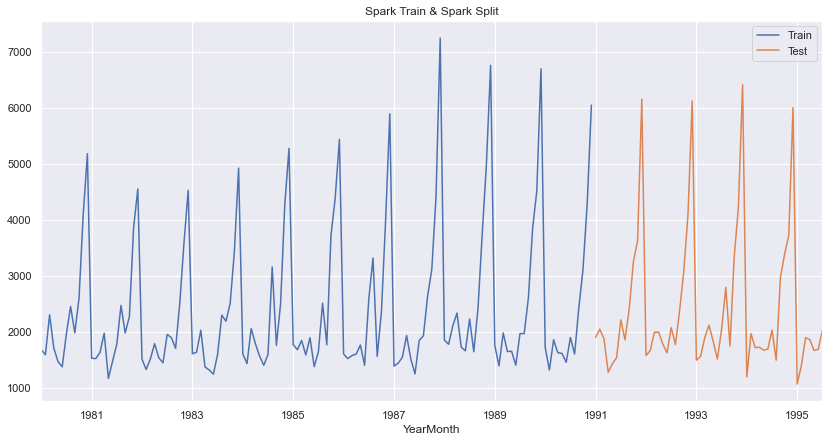

In [17]:
train_spark.plot(label='Train')
test_spark.plot(label='Test')
plt.legend()
plt.title('Spark Train & Spark Split');

In [18]:
#MODEL : LINEAR REGRESSION

In [19]:
train_time=[i+1 for i in range (len(train_spark))]
test_time=[i+43 for i in range(len(test_spark))]
print('Sparkling Training Time Instance','\n',train_time)
print('Sparkling Test Time Instance','\n',test_time)

Sparkling Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Sparkling Test Time Instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [20]:
LR_train_spark=train_spark.copy()
LR_test_spark=test_spark.copy()

In [21]:
lr = LinearRegression()
train_time = np.array(train_time).reshape(-1,1)
test_time= np.array(test_time).reshape(-1,1)

In [22]:
lr.fit(train_time,LR_train_spark)

LinearRegression()

In [23]:
train_predictions_reg=lr.predict(train_time)
train_predictions_reg = pd.Series(train_predictions_reg, index = train_spark.index)
test_predictions_reg = lr.predict(test_time)
test_predictions_reg = pd.Series(test_predictions_reg, index = test_spark.index)

In [24]:
train_predictions_reg.head()

YearMonth
1980-01-01    2021.741171
1980-02-01    2027.573830
1980-03-01    2033.406488
1980-04-01    2039.239147
1980-05-01    2045.071805
dtype: float64

In [25]:
test_predictions_reg.head()

YearMonth
1991-01-01    2266.712828
1991-02-01    2272.545487
1991-03-01    2278.378145
1991-04-01    2284.210804
1991-05-01    2290.043462
dtype: float64

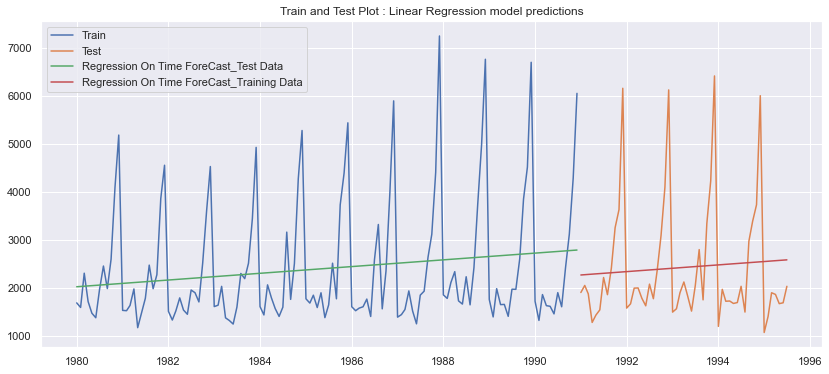

In [26]:
plt.figure(figsize=(14,6))
plt.plot( train_spark, label='Train')
plt.plot(test_spark, label='Test')
plt.plot(train_predictions_reg, label='Regression On Time ForeCast_Test Data')
plt.plot(test_predictions_reg, label='Regression On Time ForeCast_Training Data')
plt.title('Train and Test Plot : Linear Regression model predictions');
plt.legend(loc='best');

In [27]:
rmse_reg = np.sqrt(metrics.mean_squared_error(test_spark,test_predictions_reg))
print('Regression On Time Forecast on the Test Data,RMSE is %3.3F'%(rmse_reg))

Regression On Time Forecast on the Test Data,RMSE is 1275.867


In [28]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['Regression On Time'])
resultsDf.iloc[-1,:]

Test RMSE    1275.867052
Name: Regression On Time, dtype: float64

In [29]:
#MODEL 2 NAIVE BAYES

In [30]:
NaiveModel_train = pd.Series(train_spark.iloc[-1], index = train_spark.index)
NaiveModel_train.head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
dtype: int64

In [31]:
NaiveModel_test = pd.Series(train_spark.iloc[-1], index = test_spark.index)
NaiveModel_test.head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
dtype: int64

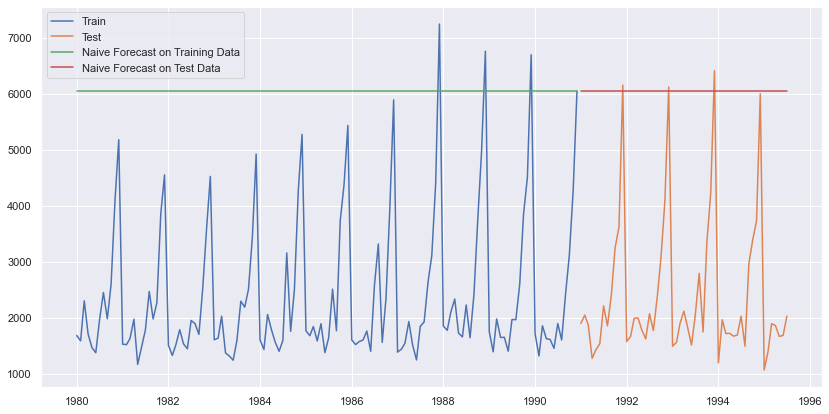

In [32]:
plt.figure(figsize=(14,7))
plt.plot( train_spark, label='Train')
plt.plot(test_spark, label='Test')
plt.plot(NaiveModel_train, label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test, label='Naive Forecast on Test Data')
plt.legend(loc='best');

In [33]:
rmse_naive = np.sqrt(metrics.mean_squared_error(test_spark,NaiveModel_test))
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 3864.279 


In [34]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.iloc[-1,:]

Test RMSE    3864.279352
Name: Naive Model, dtype: float64

In [35]:
# MODEL 3 SIMPLE AVERAGE

In [36]:
SimpleAverage_train = pd.Series(train_spark.mean(), index = train_spark.index)
SimpleAverage_train.head()

YearMonth
1980-01-01    2403.780303
1980-02-01    2403.780303
1980-03-01    2403.780303
1980-04-01    2403.780303
1980-05-01    2403.780303
dtype: float64

In [37]:
SimpleAverage_test = pd.Series(train_spark.mean(), index = test_spark.index)
SimpleAverage_test.head()

YearMonth
1991-01-01    2403.780303
1991-02-01    2403.780303
1991-03-01    2403.780303
1991-04-01    2403.780303
1991-05-01    2403.780303
dtype: float64

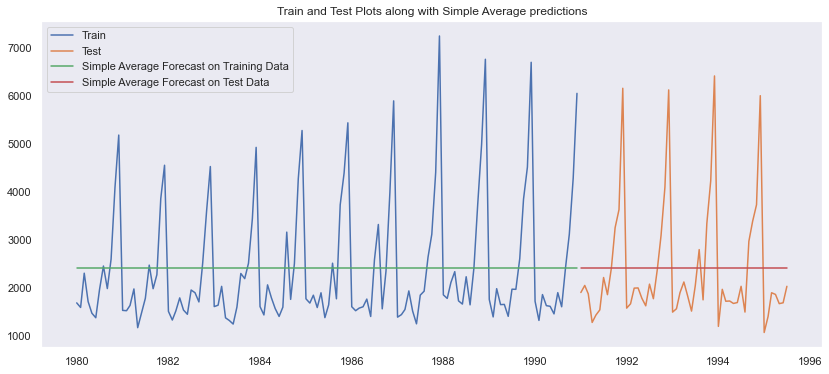

In [38]:
plt.figure(figsize=(14,6))
plt.plot( train_spark, label='Train')
plt.plot(test_spark, label='Test')
plt.plot(SimpleAverage_train, label= 'Simple Average Forecast on Training Data')
plt.plot(SimpleAverage_test, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Train and Test Plots along with Simple Average predictions")
plt.grid();

In [39]:
rmse_simple_avg = np.sqrt(metrics.mean_squared_error(test_spark, SimpleAverage_test))
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 1275.082 


In [40]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.iloc[-1,:]

Test RMSE    1275.081804
Name: Simple Average Model, dtype: float64

In [41]:
# MODEL 4
#Simple Exponential Smoothing

In [42]:
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [43]:
SES_train = train_spark.copy()
SES_test = test_spark.copy()
model_SES = SimpleExpSmoothing(SES_train)

In [44]:
#AUTO-FIT :

In [45]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
SES_train_predict = model_SES_autofit.fittedvalues
SES_train_predict.head()

YearMonth
1980-01-01    2151.614314
1980-02-01    2128.516417
1980-03-01    2101.851647
1980-04-01    2111.879693
1980-05-01    2092.042717
dtype: float64

In [47]:
SES_test_predict = model_SES_autofit.forecast(steps=len(test_spark))
SES_test_predict.head()

1991-01-01    2725.336037
1991-02-01    2725.336037
1991-03-01    2725.336037
1991-04-01    2725.336037
1991-05-01    2725.336037
Freq: MS, dtype: float64

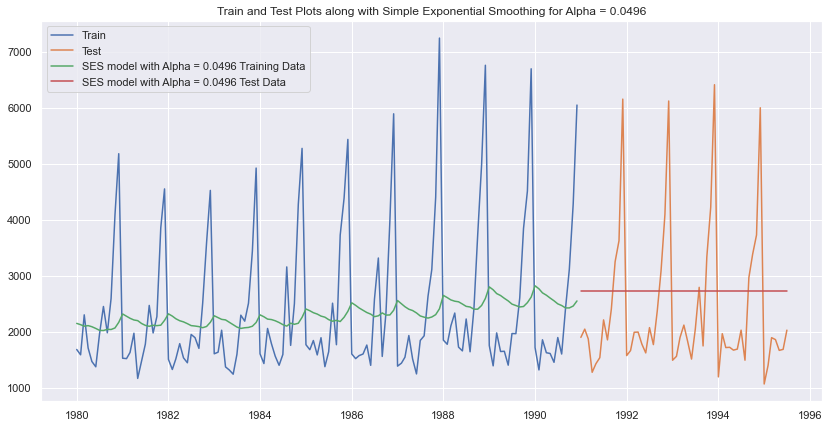

In [48]:
plt.figure(figsize=(14,7))
plt.plot(SES_train, label='Train')
plt.plot(SES_test, label='Test')
plt.plot(SES_train_predict, label='SES model with Alpha = 0.0496 Training Data')
plt.plot(SES_test_predict, label='SES model with Alpha = 0.0496 Test Data')
plt.title('Train and Test Plots along with Simple Exponential Smoothing for Alpha = 0.0496')
plt.legend(loc='best');

In [49]:

rmse_model5_test = np.sqrt(metrics.mean_squared_error(SES_test,SES_test_predict))
print("For Alpha = 0.0496 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model5_test))


For Alpha = 0.0496 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1316.135 


In [50]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0.0496, Simple Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.iloc[-1,:]

Test RMSE    1316.135411
Name: Alpha=0.0496, Simple Exponential Smoothing Optimized, dtype: float64

In [51]:
#USING DIFFERENT ALPHA VALUES

In [52]:
resultsDf_SES_iter = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
                                
resultsDf_SES_iter

,Alpha Values,Test RMSE


In [53]:
SES_train = pd.DataFrame(SES_train)
SES_test = pd.DataFrame(SES_test)
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_spark))
    

    
    rmse_model5_test_i = np.sqrt(metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i]))
    
    resultsDf_SES_iter = resultsDf_SES_iter.append({'Alpha Values':i, 'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [54]:
resultsDf_SES_iter.sort_values(by = 'Test RMSE')

,Alpha Values,Test RMSE
1,0.05,1316.411742
2,0.10,1375.393398
0,0.00,1460.954675
3,0.15,1466.203651
4,0.20,1595.206839
5,0.25,1755.488175
6,0.30,1935.507132
7,0.35,2123.914871
8,0.40,2311.919615
9,0.45,2493.786514


In [55]:
#MODEL : Double Exponential Smoothing

In [56]:
DES_train = train_spark.copy()
DES_test = test_spark.copy()
DES_train = pd.DataFrame(DES_train)
DES_test = pd.DataFrame(DES_test)

In [57]:
model_DES = Holt(DES_train['Sparkling'])

In [58]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
DES_train_predict = model_DES_autofit.fittedvalues
DES_train_predict.head()

YearMonth
1980-01-01    1591.000000
1980-02-01    1561.420827
1980-03-01    1486.796779
1980-04-01    1954.564417
1980-05-01    1692.589636
dtype: float64

In [60]:
DES_test_predict = model_DES_autofit.forecast(steps=len(test_spark))
DES_test_predict.head()

1991-01-01    5221.278699
1991-02-01    5127.886554
1991-03-01    5034.494409
1991-04-01    4941.102264
1991-05-01    4847.710119
Freq: MS, dtype: float64

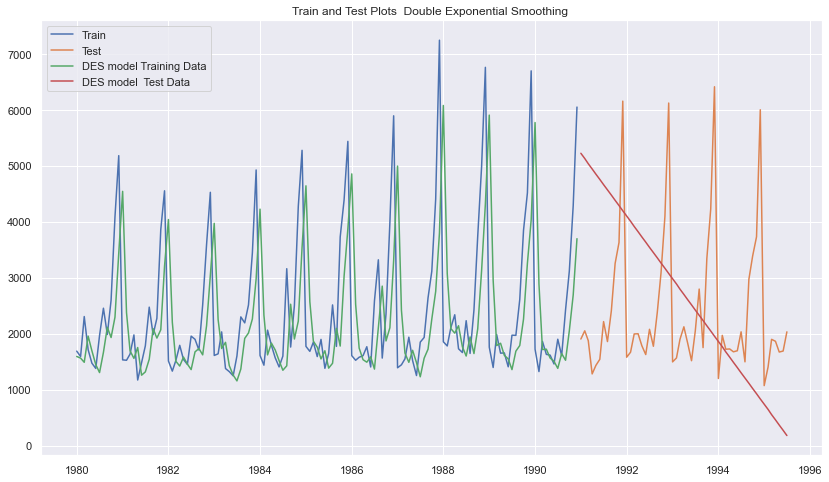

In [61]:

plt.figure(figsize=(14,8))
plt.plot(DES_train, label='Train')
plt.plot(DES_test, label='Test')

plt.plot(DES_train_predict, label='DES model Training Data')
plt.plot(DES_test_predict, label='DES model  Test Data')
plt.title('Train and Test Plots  Double Exponential Smoothing ')
plt.legend(loc='best');

In [62]:
rmse_model_test_des_autofit = np.sqrt(metrics.mean_squared_error(DES_test,DES_test_predict))
print(" Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " 
      %(rmse_model_test_des_autofit))

 Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 2007.239 


In [63]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [rmse_model_test_des_autofit]}
                           ,index=[' Double Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf.iloc[-1,:]

Test RMSE    2007.238526
Name:  Double Exponential Smoothing Optimized, dtype: float64

In [64]:
resultsDf_DES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
                                
resultsDf_DES_iter

,Alpha Values,Beta Values,Test RMSE


In [65]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_spark))
        
        
        
        rmse_model6_test = np.sqrt(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j]))
        
        
        resultsDf_DES_iter = resultsDf_DES_iter.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
                                      

In [66]:
resultsDf_DES_iter.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Test RMSE
22,0.05,0.05,1418.407668
25,0.05,0.20,1443.099273
24,0.05,0.15,1457.041594
23,0.05,0.10,1466.899629
28,0.05,0.35,1547.022626


In [67]:
resultsDf_DES_iter = resultsDf_DES_iter.sort_values(by=['Test RMSE'])
resultsDf_DES_iter.reset_index(drop =True, inplace =True)


In [68]:
DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

YearMonth
1980-01-01    1591.000000
1980-02-01    1500.987500
1980-03-01    1410.950656
1980-04-01    1363.298278
1980-05-01    1289.300273
Name: (predict, 0.05, 0.05), dtype: float64

In [69]:
DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

YearMonth
1991-01-01    2841.081120
1991-02-01    2847.642936
1991-03-01    2854.204753
1991-04-01    2860.766570
1991-05-01    2867.328387
Name: (predict, 0.05, 0.05), dtype: float64

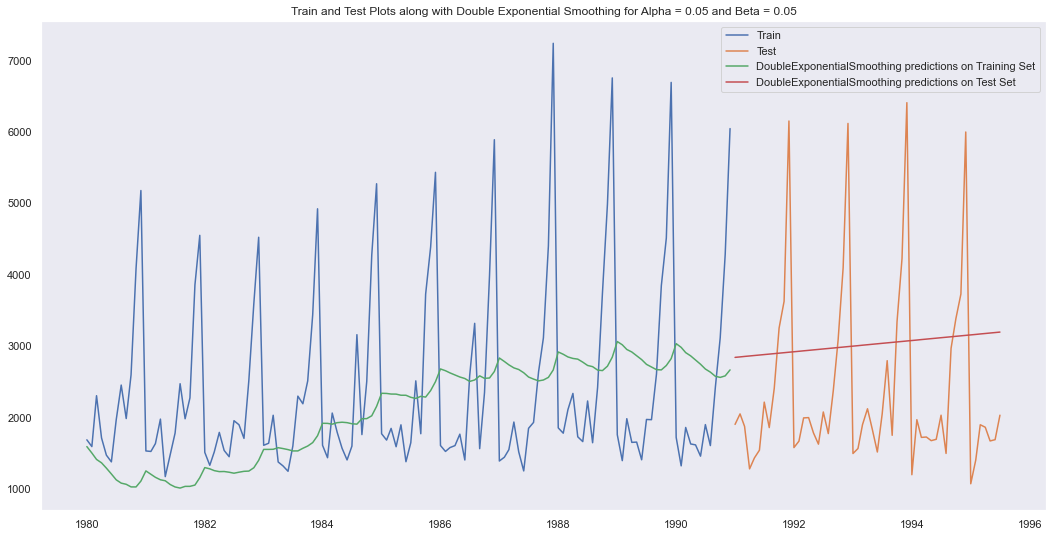

In [70]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='DoubleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Double Exponential Smoothing for Alpha = 0.05 and Beta = 0.05')

plt.legend(loc='best')
plt.grid();

In [71]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_DES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05, Beta=0.05, Double Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    1418.407668
Name: Alpha=0.05, Beta=0.05, Double Exponential Smoothing Iterative, dtype: float64

In [72]:
#TES

In [73]:
TES_train = train_spark.copy()
TES_test = test_spark.copy()
TES_train = pd.DataFrame(TES_train)
TES_test = pd.DataFrame(TES_test)


In [74]:
model_TES= ExponentialSmoothing(TES_train['Sparkling'],trend='add',seasonal='multiplicative')

In [75]:
model_TES_autofit = model_TES.fit(optimized=True)

In [76]:
model_TES_autofit.params

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
YearMonth,,
1980-01-01,1686,1710.438443
1980-02-01,1591,1646.966216
1980-03-01,2304,2249.856923
1980-04-01,1712,1908.363831
1980-05-01,1471,1513.602655


In [78]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_spark))
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1577.208163
1991-02-01,2049,1333.663154
1991-03-01,1874,1745.977341
1991-04-01,1279,1630.435405
1991-05-01,1432,1523.306429


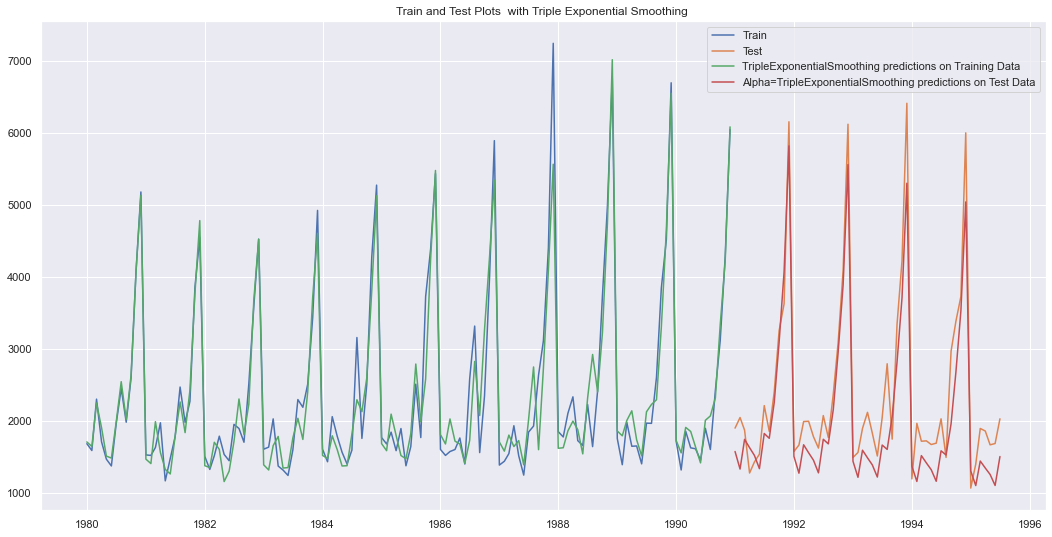

In [79]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Data')
plt.plot(TES_test['auto_predict'], label='Alpha=TripleExponentialSmoothing predictions on Test Data')
plt.title('Train and Test Plots  with Triple Exponential Smoothing ')


plt.legend(loc='best');

In [80]:

rmse_model_test_TES_auto = np.sqrt(metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict']))
print(" Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %rmse_model_test_TES_auto)

 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 469.659


In [81]:
resultsDf_TES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
                                
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [82]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        for k in np.arange(0,1.05,0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.forecast(steps=len(test_spark))
        
            
        
            rmse_model8_test = np.sqrt(metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',round(i,2),round(j,2),round(k,2)]))
            
        
            resultsDf_TES_iter = resultsDf_TES_iter.append({'Alpha Values':round(i,2),'Beta Values':round(j,2),
                                                            'Gamma Values':round(k,2), 'Test RMSE':rmse_model8_test}, ignore_index=True)
                                                           
                                      
                                     

In [83]:
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.0,0.0,0.00,3.934417e+03
1,0.0,0.0,0.05,1.586542e+04
2,0.0,0.0,0.10,2.722161e+04
3,0.0,0.0,0.15,3.711794e+04
4,0.0,0.0,0.20,4.554097e+04
...,...,...,...,...
9256,1.0,1.0,0.80,5.010607e+06
9257,1.0,1.0,0.85,8.577302e+06
9258,1.0,1.0,0.90,4.318265e+05
9259,1.0,1.0,0.95,9.549113e+05


In [84]:
resultsDf_TES_iter.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Test RMSE
467,0.05,0.05,0.25,302.454819
468,0.05,0.05,0.30,303.489118
466,0.05,0.05,0.20,306.817930
469,0.05,0.05,0.35,307.680766
803,0.05,0.85,0.25,309.959496


In [85]:
resultsDf_TES_iter = resultsDf_TES_iter.sort_values(by=['Test RMSE'])
resultsDf_TES_iter.reset_index(drop =True, inplace =True)

In [86]:
TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

YearMonth
1980-01-01    1670.443623
1980-02-01    1562.411028
1980-03-01    2243.567162
1980-04-01    1653.772679
1980-05-01    1410.219862
Name: (predict, 0.05, 0.05, 0.25), dtype: float64

In [87]:
TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

YearMonth
1991-01-01    1696.701351
1991-02-01    1499.390784
1991-03-01    1902.133940
1991-04-01    1792.471359
1991-05-01    1642.032929
Name: (predict, 0.05, 0.05, 0.25), dtype: float64

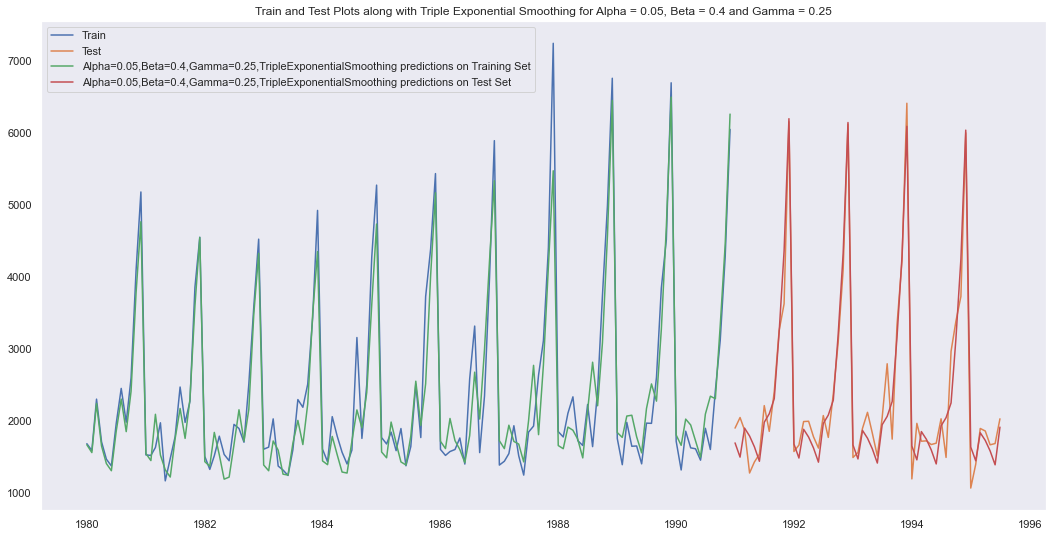

In [88]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0],resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Triple Exponential Smoothing for Alpha = 0.05, Beta = 0.4 and Gamma = 0.25')


plt.legend(loc='best')
plt.grid();

In [89]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_TES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    302.454819
Name: Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative, dtype: float64

In [90]:
resultsDf

,Test RMSE
Regression On Time,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
"Alpha=0.0496, Simple Exponential Smoothing Optimized",1316.135411
Double Exponential Smoothing Optimized,2007.238526
"Alpha=0.05, Beta=0.05, Double Exponential Smoothing Iterative",1418.407668
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",302.454819


In [91]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    

    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    
  
    plt.figure(figsize =(20,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    Overall_mean = plt.axhline(y=timeseries.mean(), color='green', label='Global Mean', linestyle='-')
    Overall_std = plt.axhline(y=timeseries.std(), color='yellow', label='Global Std', linestyle='-')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

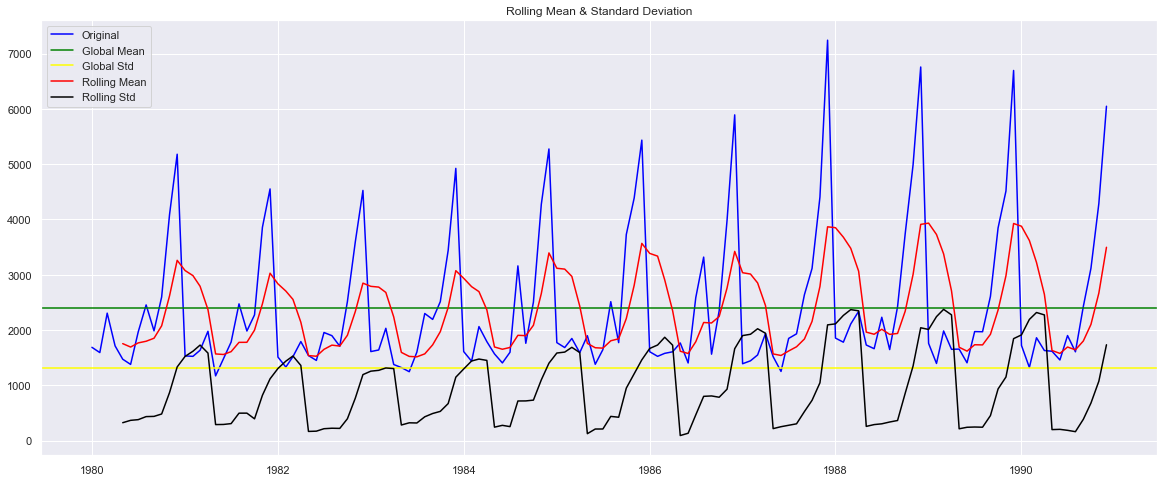

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [92]:
test_stationarity(train_spark)

In [93]:
train_spark_first_diff = train_spark.diff(1)

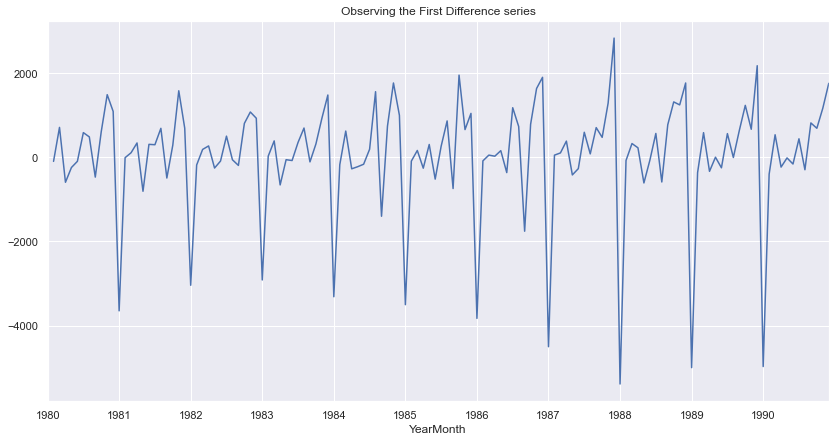

In [94]:
train_spark_first_diff.plot()
plt.title('Observing the First Difference series');

In [95]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(train_spark_first_diff.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [96]:
# ARIMA MODEL

In [97]:
import itertools
p = range(0, 5)
q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)


In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [99]:
for param in pdq:
    ARIMA_model = ARIMA(train_spark.values,order=param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    

In [100]:
ARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
ARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the ARIMA model:', len(ARIMA_AIC))

ARIMA_AIC.head(10)

Total combinations run on the ARIMA model: 20


,param,AIC
0,"(2, 1, 2)",2210.619379
1,"(3, 1, 3)",2225.661559
2,"(4, 1, 3)",2226.954554
3,"(2, 1, 3)",2227.558862
4,"(3, 1, 2)",2228.927868
5,"(4, 1, 2)",2230.896797
6,"(2, 1, 1)",2232.360490
7,"(0, 1, 2)",2232.783098
8,"(0, 1, 3)",2233.016605
9,"(1, 1, 2)",2233.597647


In [101]:
mod = ARIMA(train_spark, order=ARIMA_AIC['param'][0], freq=train_spark.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1012.813
Date:                Sun, 25 Jul 2021   AIC                           2210.619
Time:                        20:12:20   BIC                           2227.871
Sample:                    02-01-1980   HQIC                          2217.629
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5852      0.517     10.799      0.000       4.571       6.599
ar.L1.D.Sparkling     1.2699      0.075     17.045      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [102]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [103]:
predict_test.head()

1991-01-01    4246.945682
1991-02-01    2818.314647
1991-03-01    2014.008424
1991-04-01    1794.467644
1991-05-01    1967.804418
Freq: MS, dtype: float64

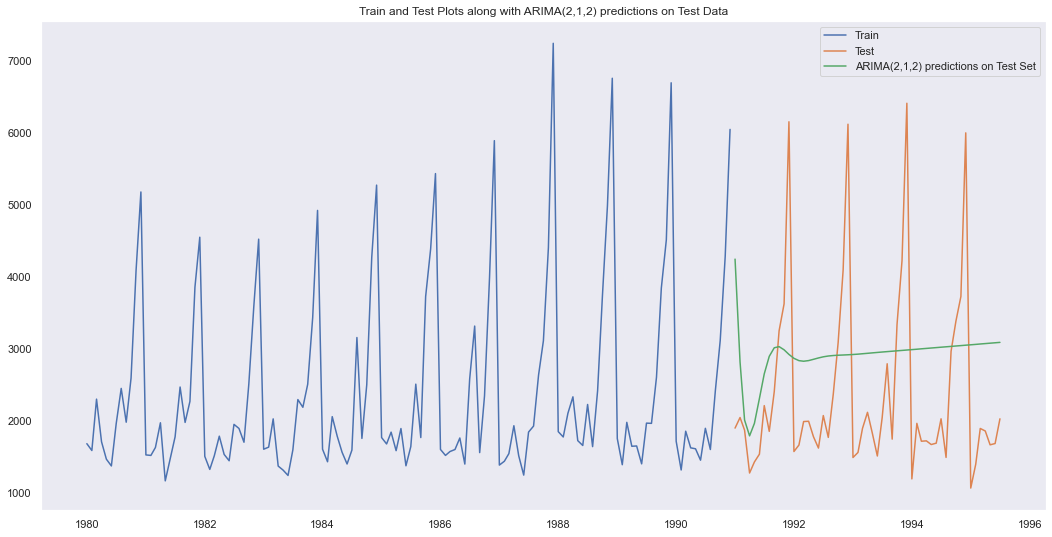

In [104]:
plt.figure(figsize=(18,9))
plt.plot(train_spark, label='Train')
plt.plot(test_spark, label='Test')

plt.plot(predict_test, label='ARIMA(2,1,2) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(2,1,2) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

In [105]:
rmse = np.sqrt(mean_squared_error(test_spark,predict_test))
print("ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is 1374.549


In [106]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

In [107]:
#SARIMA MODELS

In [108]:
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(0,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [110]:
import  statsmodels.api as  sm

In [111]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_spark, freq=train_spark.index.inferred_freq,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640237396
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.862633467952
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574255433
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.990530139051
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791978
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908186603
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307668
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158617236
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920742
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866615
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155366381

SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324116908
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645269
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140931207682
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.6086053249624
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.3404023522648
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.116864441155
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892470883
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972419730624
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1625.2275445043315
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.5476040998983
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.8401262530028
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339992807
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161214409
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.62778462125


In [112]:
SARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
SARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the SARIMA model:', len(SARIMA_AIC))

SARIMA_AIC.head(10)

Total combinations run on the SARIMA model: 162


,param,seasonal,AIC
0,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
1,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
2,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
3,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
4,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867
5,"(1, 1, 2)","(2, 1, 2, 12)",1385.688721
6,"(0, 1, 2)","(2, 1, 2, 12)",1386.023734
7,"(2, 1, 2)","(1, 1, 2, 12)",1386.097242
8,"(2, 1, 2)","(2, 1, 2, 12)",1387.627785
9,"(1, 1, 1)","(0, 1, 2, 12)",1398.756167


In [113]:
mod = sm.tsa.statespace.SARIMAX(train_spark, freq=train_spark.index.inferred_freq,
                                order=SARIMA_AIC['param'][0],
                                seasonal_order=SARIMA_AIC['seasonal'][0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 25 Jul 2021   AIC                           1382.348
Time:                                    20:15:30   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

In [114]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [115]:
predict_test.head()

1991-01-01    1460.244616
1991-02-01    1392.437190
1991-03-01    1743.201700
1991-04-01    1650.066945
1991-05-01    1522.656033
Freq: MS, Name: predicted_mean, dtype: float64

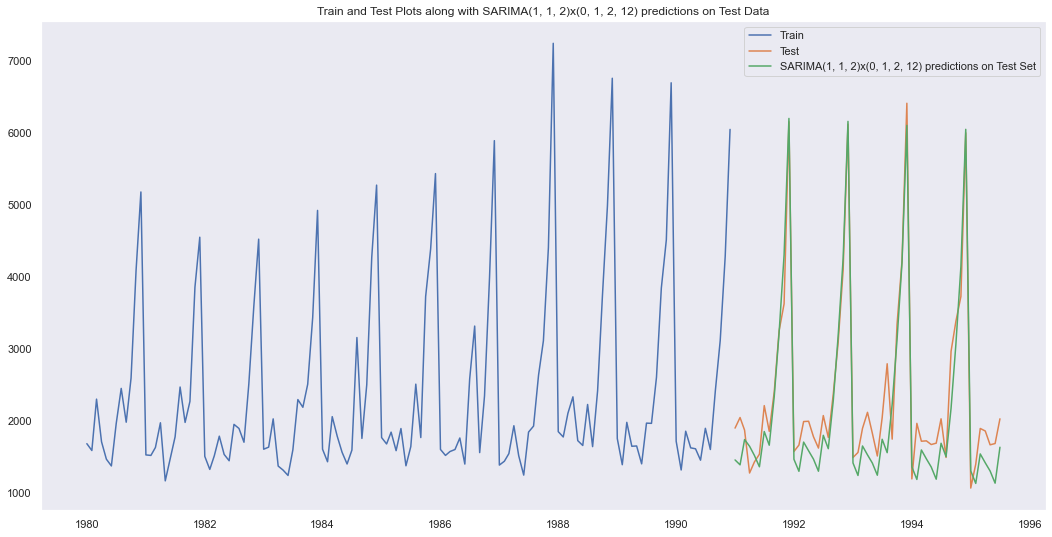

In [116]:

plt.figure(figsize=(18,9))
plt.plot(train_spark, label='Train')
plt.plot(test_spark, label='Test')

plt.plot(predict_test, label='SARIMA(1, 1, 2)x(0, 1, 2, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(1, 1, 2)x(0, 1, 2, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

In [117]:
#MODEL EVALUATION

In [118]:
rmse = np.sqrt(mean_squared_error(test_spark,predict_test))
print("SARIMA(1, 1, 2)x(0, 1, 2, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(1, 1, 2)x(0, 1, 2, 12) Model forecast on the Test Data,  RMSE is 382.577


In [119]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)x(0, 1, 2, 12) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(2,1,2) Automated AIC",1374.549422
"SARIMA(1, 1, 2)x(0, 1, 2, 12) Automated AIC",382.576709


In [120]:
print('The p value of the Dickey-Fuller Test on Train data:', adfuller(train_spark, autolag='AIC')[1])

The p value of the Dickey-Fuller Test on Train data: 0.6697444263523349


In [121]:
train_first_diff = train_spark.diff(1)

In [122]:
print('The p value of the Dickey-Fuller Test after First Differencing:', adfuller(train_first_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing: 2.280104355826052e-12


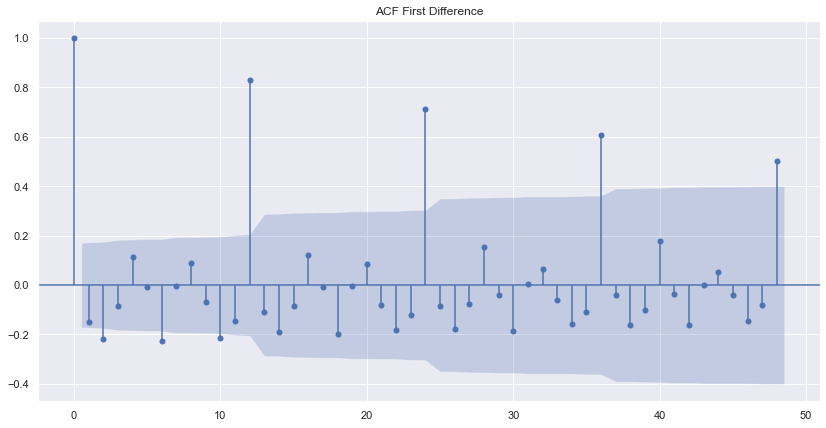

In [123]:
plot_acf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Difference');

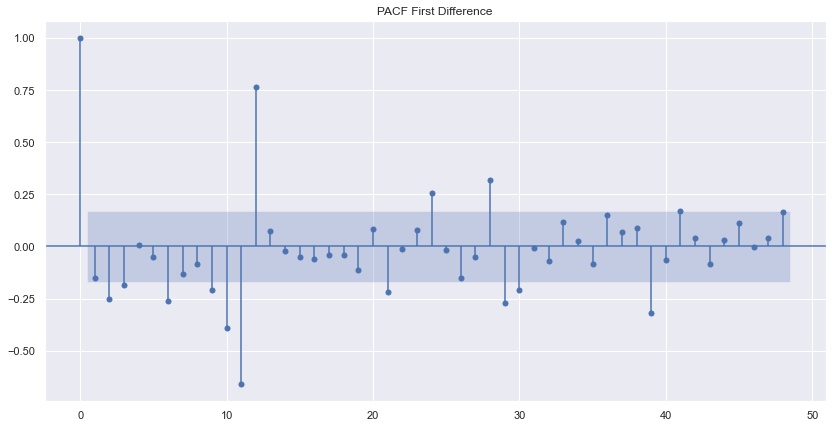

In [124]:
plot_pacf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('PACF First Difference');

In [125]:
#ARIMA MODE MANUAL

In [126]:
mod = ARIMA(train_spark, order=(3,1,2), freq=train_spark.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.230
Date:                Sun, 25 Jul 2021   AIC                           2228.928
Time:                        20:15:32   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9846      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4419   1.21e-05  -3.64e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

In [127]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [128]:
predict_test.head()

1991-01-01    3915.812239
1991-02-01    2896.884518
1991-03-01    2258.734122
1991-04-01    2768.349314
1991-05-01    2609.772407
Freq: MS, dtype: float64

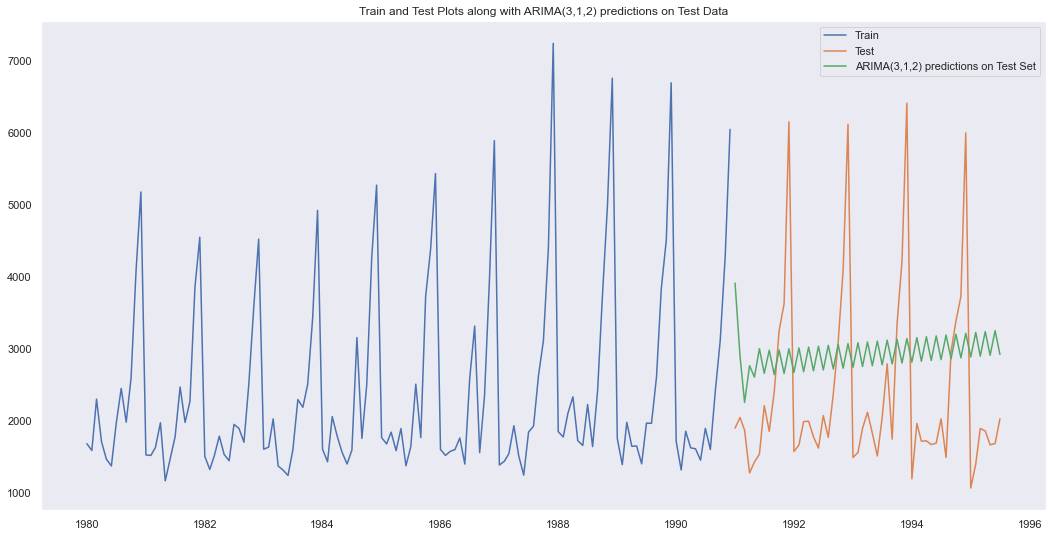

In [129]:
plt.figure(figsize=(18,9))
plt.plot(train_spark, label='Train')
plt.plot(test_spark, label='Test')

plt.plot(predict_test, label='ARIMA(3,1,2) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(3,1,2) predictions on Test Data')         
plt.legend(loc='best')
plt.grid();

In [130]:
rmse = np.sqrt(mean_squared_error(test_spark,predict_test))
print("ARIMA(3,1,2) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(3,1,2) Model forecast on the Test Data,  RMSE is 1379.052


In [131]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

In [132]:
train_first_diff = train_first_diff.dropna()
train_first_seasonal_diff = train_first_diff - train_first_diff.shift(12)

In [133]:
print('The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift:',
      adfuller(train_first_seasonal_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift: 0.013066196701392049


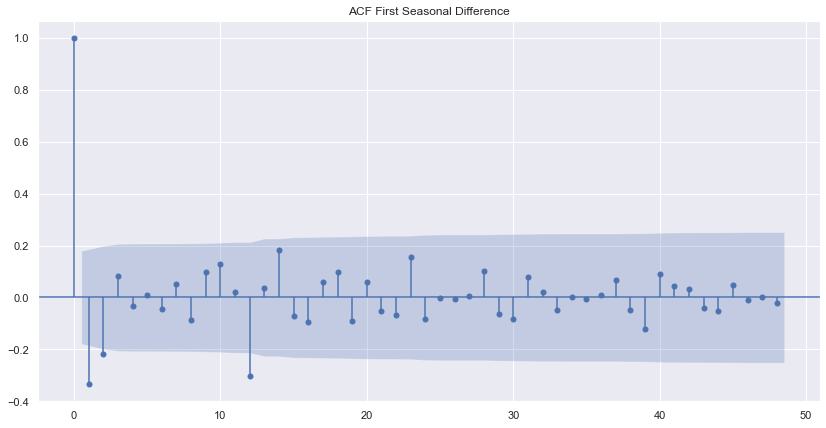

In [134]:
plot_acf(train_first_seasonal_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Seasonal Difference');

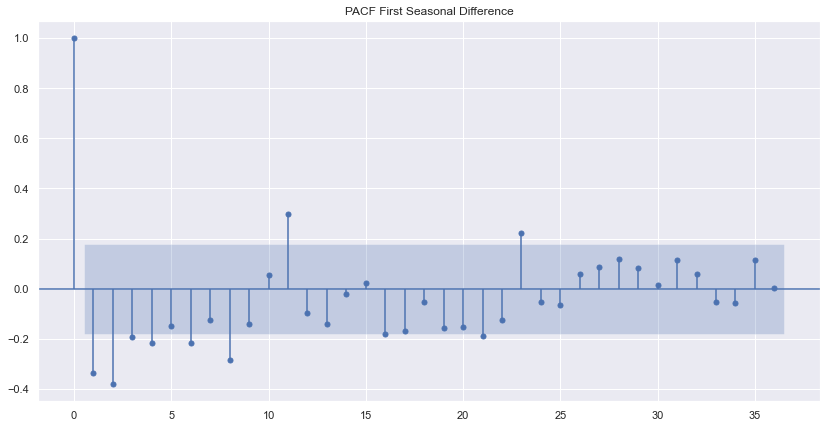

In [135]:
plot_pacf(train_first_seasonal_diff.dropna(),lags=36, alpha=0.05)
plt.title('PACF First Seasonal Difference');

In [136]:
#SARIMA MANUAL

In [137]:
mod = sm.tsa.statespace.SARIMAX(train_spark, freq=train_spark.index.inferred_freq,
                                order=(4,1,2),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -765.235
Date:                              Sun, 25 Jul 2021   AIC                           1548.470
Time:                                      20:15:36   BIC                           1572.183
Sample:                                  01-01-1980   HQIC                          1558.074
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7935      0.132     -6.007      0.000      -1.052      -0.535
ar.L2          0.07

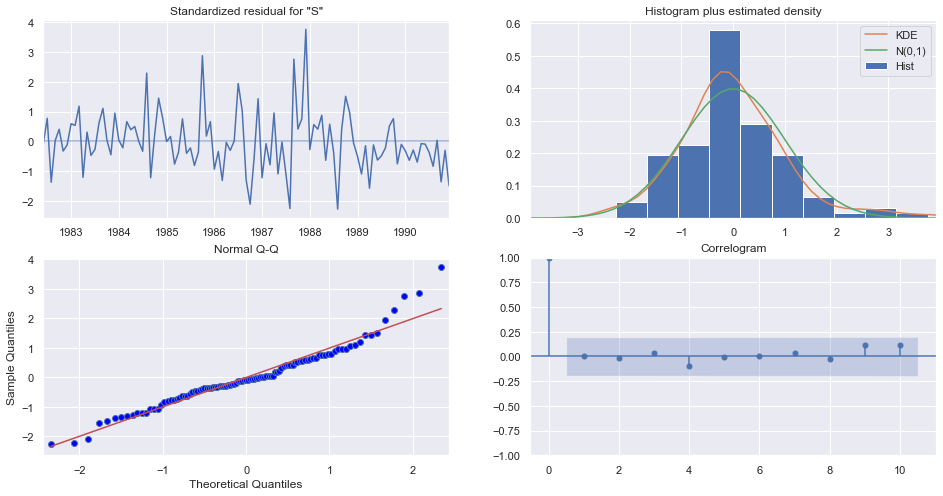

In [138]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))

plt.show()

In [139]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

predict_test.head()

1991-01-01    1446.991421
1991-02-01    1335.649286
1991-03-01    1705.457446
1991-04-01    1628.186618
1991-05-01    1455.568450
Freq: MS, Name: predicted_mean, dtype: float64

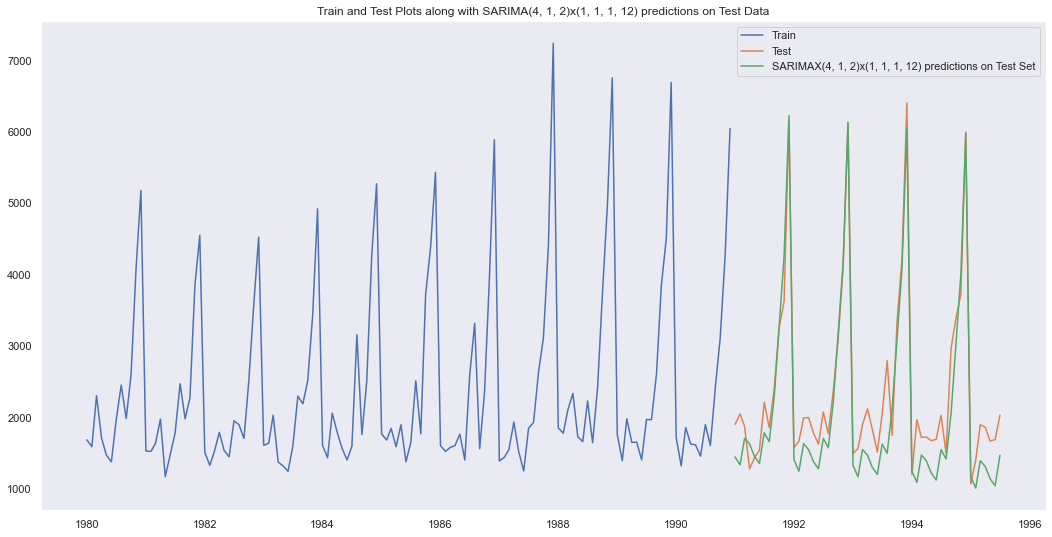

In [140]:
plt.figure(figsize=(18,9))
plt.plot(train_spark, label='Train')
plt.plot(test_spark, label='Test')

plt.plot(predict_test, label='SARIMAX(4, 1, 2)x(1, 1, 1, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(4, 1, 2)x(1, 1, 1, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();


In [141]:
rmse = np.sqrt(mean_squared_error(test_spark,predict_test))
print("SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is 434.921


In [142]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(3,1,2) ACF/PACF",1379.051960
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",434.921059


In [143]:
resultsDf.sort_values(by = 'Test RMSE')

,Test RMSE
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",302.454819
"SARIMA(1, 1, 2)x(0, 1, 2, 12) Automated AIC",382.576709
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",434.921059
Simple Average Model,1275.081804
Regression On Time,1275.867052
"Alpha=0.0496, Simple Exponential Smoothing Optimized",1316.135411
"ARIMA(2,1,2) Automated AIC",1374.549422
"ARIMA(3,1,2) ACF/PACF",1379.051960
"Alpha=0.05, Beta=0.05, Double Exponential Smoothing Iterative",1418.407668
Double Exponential Smoothing Optimized,2007.238526


In [144]:
#forecast
#Optimum Model

In [145]:
fullmodel = ExponentialSmoothing(Sparkling,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.05,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.25)

In [146]:
prediction = fullmodel.forecast(steps=12)

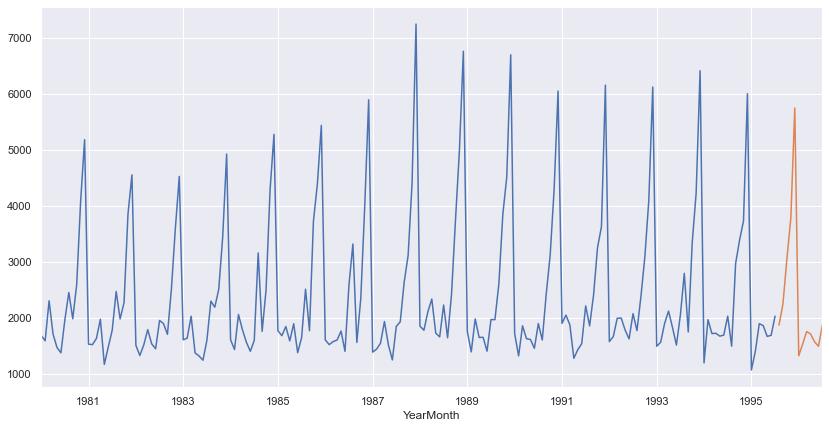

In [147]:
Sparkling.plot()
prediction.plot();

In [148]:
pred_spark = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_spark

,lower_CI,prediction,upper_ci
1995-08-01,500.019166,1869.943161,7073.819599
1995-09-01,879.932145,2249.856140,7453.732578
1995-10-01,1681.309958,3051.233953,8255.110391
1995-11-01,2411.742094,3781.666089,8985.542527
1995-12-01,4373.411541,5743.335536,10947.211974
1996-01-01,-46.396255,1323.527740,6527.404178
1996-02-01,163.282019,1533.206014,6737.082452
1996-03-01,386.546550,1756.470545,6960.346983
1996-04-01,342.608027,1712.532022,6916.408460
1996-05-01,204.944085,1574.868080,6778.744518


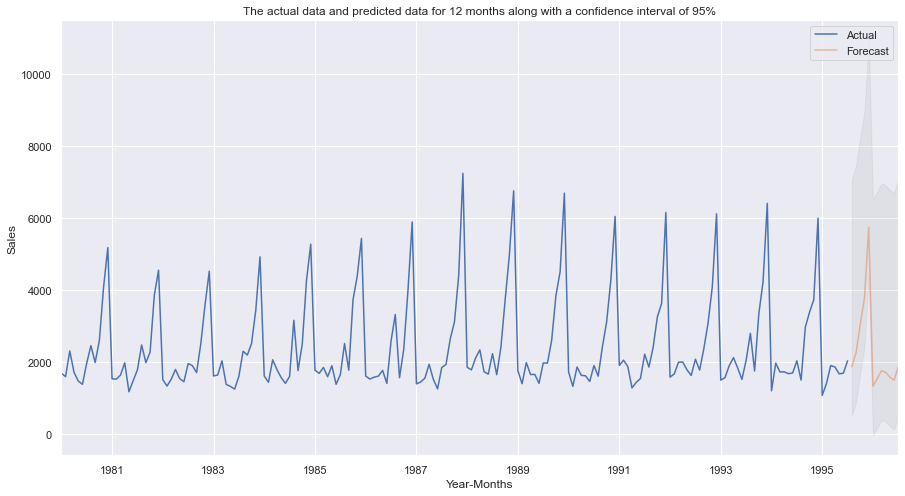

In [149]:
axis = Sparkling.plot(label='Actual', figsize=(15,8))
pred_spark['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_spark.index, pred_spark['lower_CI'], pred_spark['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('The actual data and predicted data for 12 months along with a confidence interval of 95%')
plt.legend(loc='best')
plt.show()


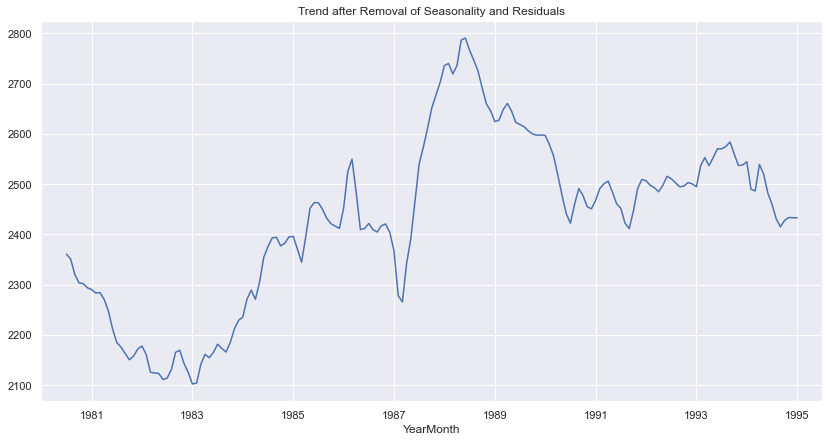

In [150]:
decomposition_mul.trend.plot()
plt.title('Trend after Removal of Seasonality and Residuals');

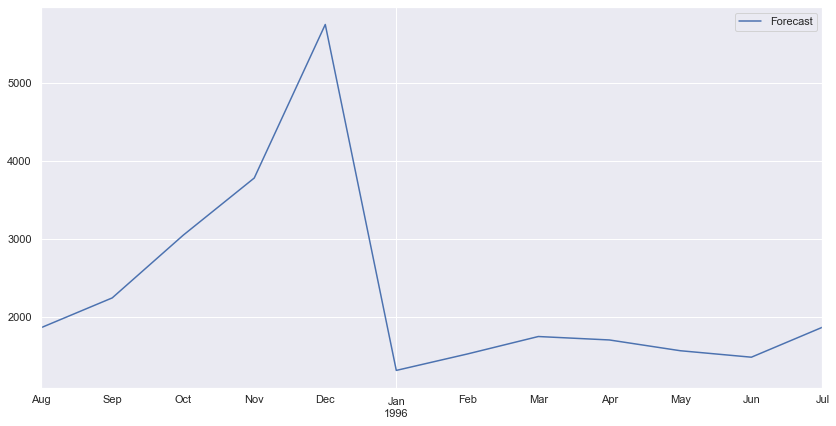

In [151]:

prediction.plot(label = 'Forecast');
plt.legend(loc='best')

In [152]:
prediction

1995-08-01    1869.943161
1995-09-01    2249.856140
1995-10-01    3051.233953
1995-11-01    3781.666089
1995-12-01    5743.335536
1996-01-01    1323.527740
1996-02-01    1533.206014
1996-03-01    1756.470545
1996-04-01    1712.532022
1996-05-01    1574.868080
1996-06-01    1492.241395
1996-07-01    1874.870187
Freq: MS, dtype: float64